In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.optimize as opt

In [2]:
df=pd.read_csv('D:\ML Andrew Ngs\Week3\coding assn\machine-learning-ex2\ex2\ex2data2.txt',names=['test1','test2','quality'])

In [3]:
df.head()

,test1,test2,quality
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
test1      118 non-null float64
test2      118 non-null float64
quality    118 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.9 KB


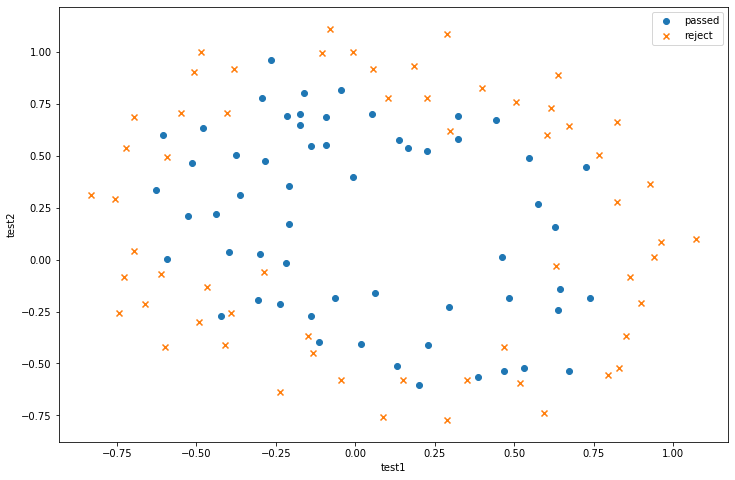

In [5]:
fig,ax=plt.subplots(figsize=(12,8))


ax.scatter(df['test1'][df['quality']==1],df['test2'][df['quality']==1],marker='o',label='passed')

ax.scatter(df['test1'][df['quality']==0],df['test2'][df['quality']==0],marker='x',label='reject')

ax.set_xlabel('test1')
ax.set_ylabel('test2')

ax.legend()
ax.plot();


In [6]:
# Collecting feature in X and Y
X=df[['test1','test2']]
Y=df[['quality']]

In [7]:
def MappingFeature(X1,X2,degree):
    '''This function for feature mapping for 2 feature '''
    arr=np.ones(shape=(X1.shape[0],1))
    for i in range(1,degree+1):
        for j in range(i+1):
            mul=(X1**(i-j))*(X2**(j))
            arr=np.hstack((arr,np.array(mul).reshape(X1.shape[0],1)))
    return(arr)

In [8]:
X_map=MappingFeature(X.iloc[:,0],X.iloc[:,1],6)
theta=np.zeros(shape=(X_map.shape[1],1))
Y=np.array(Y).reshape((Y.shape[0],1))
m=len(df)
lamda=1

In [9]:
def sigmoid(X_map,theta):
    z=np.dot(X_map,theta)
    return(1/(1+np.exp(-z)))

def Costfunction(theta,X_map,Y,lamda):
    h=sigmoid(X_map,theta)
    err=-(1/m)*np.sum((Y*np.log(h)+(1-Y)*np.log(1-h))) # Usual error
    reg=(lamda/(2*m))*np.sum(theta[1:]**2) # Error including regularization
    J=err+reg
    return(J)

def Gradient(theta,X_map,Y,lamda):
    h=sigmoid(X_map,theta)
    diff=(h-Y)
    m=len(df)
    grad=np.zeros([m,1])
    grad=(1/m)*np.dot(X_map.T,diff)
    grad[1:]=grad[1:]+(lamda/m)*(theta[1:])
    return(grad)

In [10]:
gr=Gradient(theta,X_map,Y,lamda)
cf=Costfunction(theta,X_map,Y,lamda)
print('Cost function with initial theta is {}'.format(cf))

Cost function with initial theta is 0.6931471805599454


In [11]:
result = opt.fmin_tnc(func=Costfunction, x0=theta, fprime=Gradient, args=(X_map, Y.flatten(),1))

optimised_theta=np.reshape(result[0],(X_map.shape[1],1))

Cost_optimised=Costfunction(optimised_theta,X_map,Y,lamda)

print("optimised Cost function is {}".format(Cost_optimised))

optimised Cost function is 0.5290027299645337


### Accuracy

In [12]:
def accuracy(theta,X_map,Y):
    '''Function will take features and uses optimised theta value. 
    Then it comapres how many features X are corectly classified as Y'''
    
    pred=[sigmoid(X_map,optimised_theta)>=0.5]
    pred_acc=np.mean(pred==Y)
    return(pred_acc*100)
    
acc=accuracy(optimised_theta,X_map,Y)

print ("Accuracy of our model is {}".format(acc))

Accuracy of our model is 83.05084745762711


### Plotting the data


In [13]:
def Contourplot(X_map,optimised_theta):
    var1=df[['test1']].sort_values('test1')
    var2=df[['test2']].sort_values('test2')

    l1,l2=np.meshgrid(var1,var2)

    l1=l1.flatten()
    l2=l2.flatten()

    opt=MappingFeature(l1,l2,6)

    l3=np.dot(opt,optimised_theta)

    l1=l1.reshape((len(var1),len(var2)))
    l2=l2.reshape((len(var1),len(var2)))
    l3=l3.reshape((len(var1),len(var2)))

    fig,ax=plt.subplots(figsize=(12,8))
    ax.scatter(df['test1'][df['quality']==1],df['test2'][df['quality']==1],marker='o',label='passed')
    ax.scatter(df['test1'][df['quality']==0],df['test2'][df['quality']==0],marker='x',label='reject')

    ax.set_xlabel('test1')
    ax.set_ylabel('test2')

    ax.legend()

    # To plot the contour we need 3 axis X,Y and Z.
    # As we ned our plot in 2D we used levels=[0]

    cs=(ax.contour(l1,l2,l3,levels=[0],cmap= "Greys_r"))
    
    return(cs)


### Plot the countor for different values of lamda

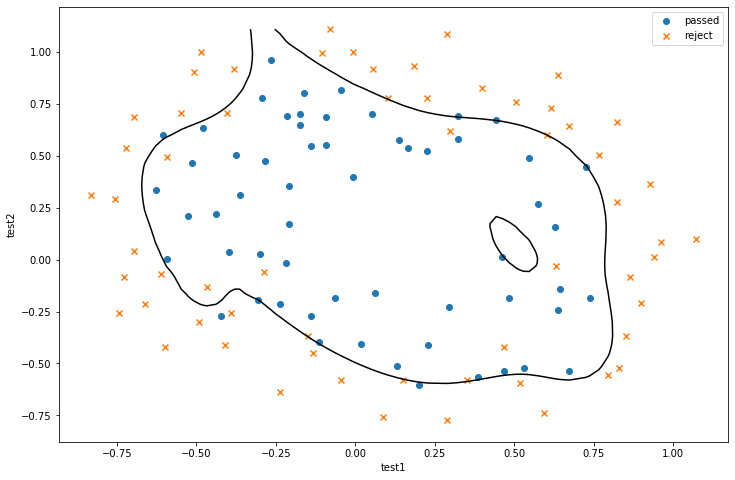

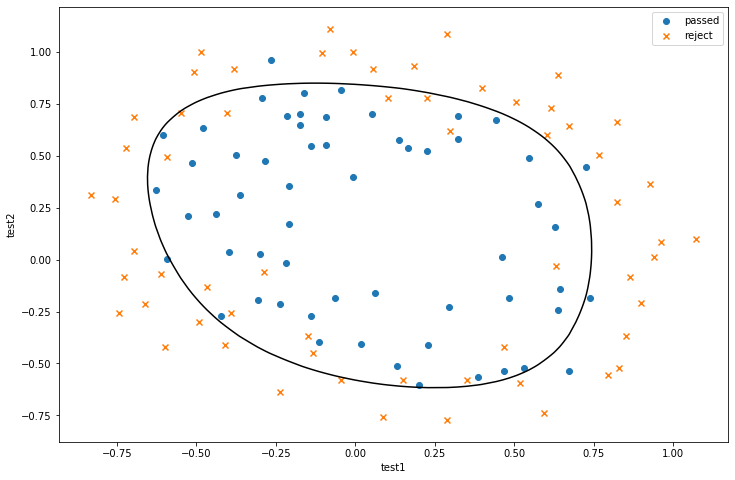

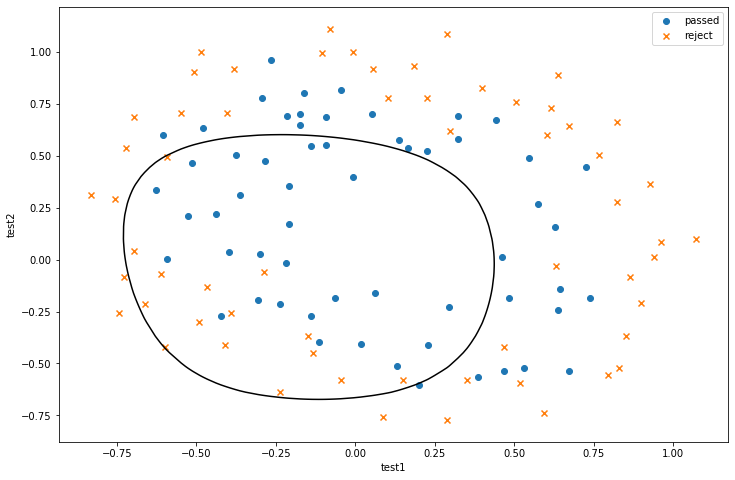

In [14]:
for _ in [0,1,100]:
    result1 = opt.fmin_tnc(func=Costfunction, x0=theta, fprime=Gradient, args=(X_map, Y.flatten(),_))
    new_theta=np.reshape(result1[0],(X_map.shape[1],1))
    boundry=Contourplot(X_map,new_theta)
    print(boundry)